In [1]:
%conda install matplotlib -y

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Retrieving notices: ...working... DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
done
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
\ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch

# 8회차 과제
목표: ANOVA를 정확하게 이해하고 적용해보기.  
(수업 자료의 `과제 연계 실습` 참고)

## One-way ANOVA

다음은 세 도시에서 다섯 명씩 뽑아 IQ를 검사한 결과이다.

세 도시의 IQ 평균이 서로 같은지 One-way ANOVA를 통해 알아보고, 서로 다르다면 어느 도시가 다른지 찾으시오.

In [2]:
iq = pd.DataFrame({'City A': [128, 147, 88, 110, 115], 'City B': [150, 153, 155, 147, 165], 'City C': [99, 102, 88, 155, 128]})
display(iq)

,City A,City B,City C
0,128,150,99
1,147,153,102
2,88,155,88
3,110,147,155
4,115,165,128


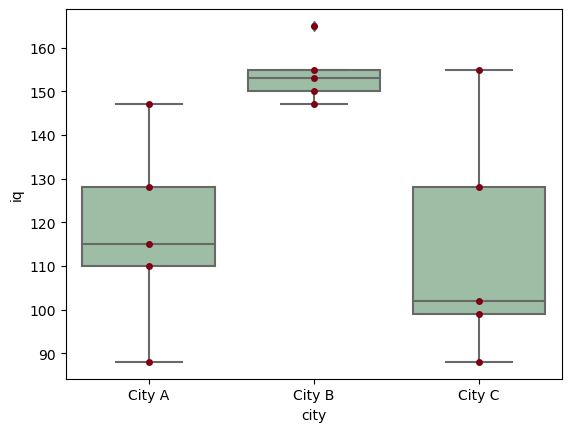

In [3]:
iq_plot = pd.melt(iq.reset_index(), id_vars=['index'], value_vars=['City A', 'City B', 'City C'])
iq_plot.columns = ['index', 'city', 'iq']

ax = sns.boxplot(x='city', y='iq', data=iq_plot, color='#99c2a2')
ax = sns.swarmplot(x='city', y='iq', data=iq_plot, color='#7d0013')
plt.show()

In [4]:
#귀무 가설: 세 도시의 평균 IQ는 서로 같다.  
#대립 가설: 세 도시의 평균 IQ가 모두 서로 같은 것은 아니다.

In [5]:
fvalue, pvalue = stats.f_oneway(iq['City A'], iq['City B'], iq['City C'])
print(fvalue, pvalue)

5.780821917808219 0.017452351669966726


In [6]:
#해석: P-value가 0.01이므로 귀무 가설을 기각할 근거가 충분하다.  
# => 세 도시의 평균 IQ가 모두 서로 같은 것은 아니다!

## Two-way ANOVA

다음은 네 명의 환자에게 서로 다른 세 가지의 처치를 시행한 후 호전도를 측정한 결과이다. (단, 환자와 처치 간 연관성은 없다고 가정한다.)

환자 사이의 호전도 평균이 모두 같은지, 또 처치 사이의 호전도 평균이 모두 같은지 two-way ANOVA를 통해 알아보시오.

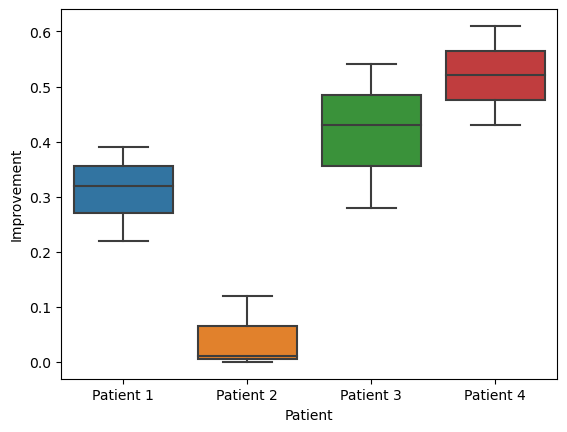

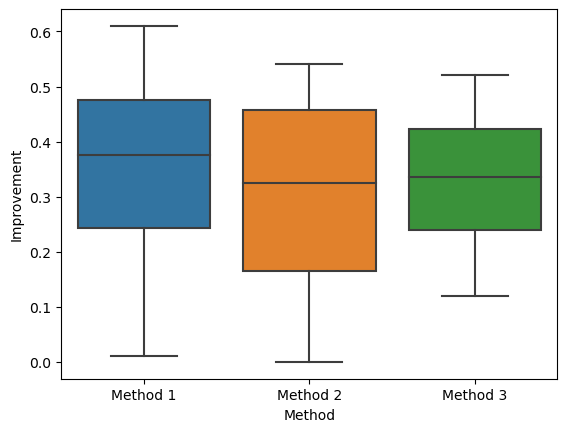

In [16]:
health = pd.DataFrame({'Patient': ['Patient 1', 'Patient 2', 'Patient 3', 'Patient 4'], 'Method 1': [0.32, 0.01, 0.43, 0.61], 'Method 2': [0.22, 0, 0.54, 0.43], 'Method 3': [0.39, 0.12, 0.28, 0.52]})


health = pd.melt(health, id_vars=['Patient'], value_vars=['Method 1', 'Method 2', 'Method 3'])
health.columns = ['Patient', 'Method', 'Improvement']

sns.boxplot(x='Patient', y='Improvement', data=health)
plt.show()

sns.boxplot(x='Method', y='Improvement', data=health)
plt.show()

In [17]:
#귀무 가설 1: 환자간 호전도 평균은 모두 같다.
#대립 가설 1: 환자간 호전도 평균이 모두 같은 것은 아니다.

#귀무 가설 2: 처지간 호전도 평균은 모두 같다.
#대립 가설 2: 처지간 호전도 평균이 모두 같은 것은 아니다.

In [19]:
model = ols('Improvement ~ C(Patient) + C(Method)', data=health).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Patient),0.377892,3.0,10.869367,0.007716
C(Method),0.004200,2.0,0.181208,0.838663
Residual,0.069533,6.0,NaN,NaN


In [20]:
#해석: 환자간 호전도 평균의 경우 P-value가 0.05보다 작으므로 귀무 가설을 기각할 근거가 충분하다. 
#     처지간 호전도 평균의 경우 P-value가 0.05보다 크므로 귀무 가설을 기각할 근거가 충분하지 않다.
# => 환자 사이에 호전도 평균이 다른 경우가 있지만 처지 사이 호전도 평균은 모두 같다.